## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results  = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results  = pd.read_csv(study_results)

# Combine the data into a single dataset based on mouse id
df = pd.merge(mouse_metadata, study_results,  on="Mouse ID", how = "outer")
df = pd.merge(study_results, mouse_metadata,  on="Mouse ID", how = "outer")

# df

## Summary statistics

In [2]:
# Generate a summary statistics table consisting of the mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.

byRegimen = df.groupby("Drug Regimen")
tumor_col = 'Tumor Volume (mm3)'

ss_dict = {'Mean Tumor volume'              : byRegimen[tumor_col].mean(), 
           'Median Tumor volume'            : byRegimen[tumor_col].median(), 
           'Tumor volume Variance'          : byRegimen[tumor_col].var(), 
           'Tumor volume Standard Deviation': byRegimen[tumor_col].std(), 
           'Tumor volume SEM'               : byRegimen[tumor_col].sem()}
summaryStats = pd.DataFrame(data=ss_dict)

summaryStats

,Mean Tumor volume,Median Tumor volume,Tumor volume Variance,Tumor volume Standard Deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
tumors = df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' 
       : ['mean',
          'median',
          'var',
          'std',
          'sem']}) #["Tumor Volume (mm3)"]

tumors

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

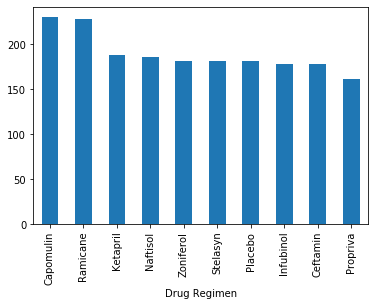

In [4]:
# Generate a bar plot showing number of data points for each 
# treatment regimen using pandas
plotData = byRegimen['Mouse ID'].count().sort_values(ascending = False)
plotData.plot.bar(x='Drug', y = "Quantity")

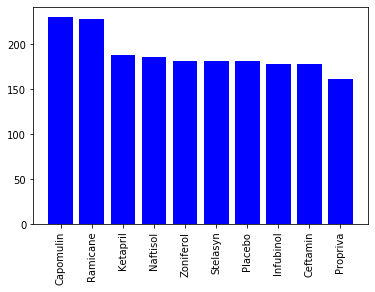

In [5]:
# Generate a bar plot showing number of data points for each treatment 
# regimen using pyplot

# Count the number of mice (by id) in each regimen and sort them descending order
plotdf = byRegimen['Mouse ID'].count().sort_values(ascending = False)

# Set the values for the x_axis and map the drug names onto the values
x_axis = np.arange(len(plotdf))
plt.xticks(x_axis, plotdf.keys(), rotation=90)

# plot the data using pyplot
plt.bar(x_axis, plotdf, color='b', align="center")

# Display the plot
plt.show()

## Pie plots

Text(0, 0.5, 'Sex')

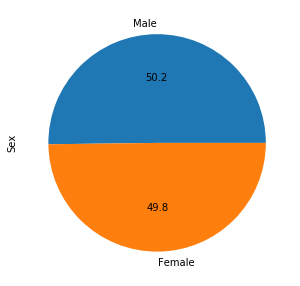

In [6]:
# Generate a pie plot showing the distribution of 
# female versus male mice using pandas
mf_mice = df.groupby(['Mouse ID', 'Sex']).size().groupby(level=1).count().sort_values(ascending = False)
plot    = mf_mice.plot(kind = 'pie', y ='Sex', figsize=(5, 5), autopct='%.1f')
plot.set_ylabel("Sex")

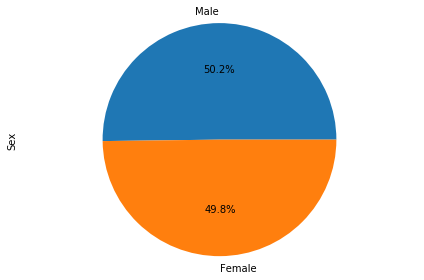

In [7]:
# Generate a pie plot showing the distribution of female 
# versus male mice using pyplot
def format_value(val):
    return "{:.1f}%".format(val)

labels =  ["Male", "Female"]

plt.pie   (mf_mice, labels = labels,  autopct=format_value )
plt.axis  ('equal')
plt.ylabel('Sex')

plt.tight_layout()
plt.show()


## Quartiles, outliers and boxplots

In [8]:
def checkForOutliers(drug):
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume for  is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

# Calculate the final tumor volume of each mouse across four 
# of the most promising treatment regimens.

drugnames = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
topfour   = df[df['Drug Regimen'].isin(drugnames)]
mice      = topfour.groupby("Mouse ID")
mdf       = mice.tail(1)
mdf       = mdf[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']].sort_values('Drug Regimen').reset_index()
mdf

#Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugnames:
    print(drug)
    checkForOutliers(topfour[topfour["Drug Regimen"] == drug]['Tumor Volume (mm3)'])


Capomulin
The lower quartile of tumor volume for  is: 37.685932865
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 7.314067135000002
The the median of tumor volume is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Ramicane
The lower quartile of tumor volume for  is: 36.67463458499999
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 8.325365415000007
The the median of tumor volume is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.
Infubinol
The lower quartile of tumor volume for  is: 47.3123533
The upper quartile of tumor volume is: 57.314443967500004
The interquartile range of tumor volume is: 10.002090667500006
The the median of tumor volume is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
Ceftamin
The lo

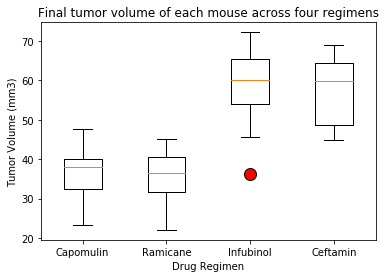

In [9]:
# Generate a box plot of the final tumor 
# volume of each mouse across four regimens of interest

mice      = df.groupby("Mouse ID")
mdf       = mice.tail(1)

capomulin = mdf[mdf["Drug Regimen"] == "Capomulin"]
ramicane  = mdf[mdf["Drug Regimen"] == "Ramicane"]
infubinol = mdf[mdf["Drug Regimen"] == "Infubinol"]
ceftamin  = mdf[mdf["Drug Regimen"] == "Ceftamin"]

datatoplot = [capomulin['Tumor Volume (mm3)'], 
              ramicane ['Tumor Volume (mm3)'], 
              infubinol['Tumor Volume (mm3)'], 
              ceftamin ['Tumor Volume (mm3)']]

fig, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across four regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')

drugnames = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

ax1.boxplot(datatoplot, flierprops=flierprops, labels=drugnames)

plt.show()


## Line and scatter plots

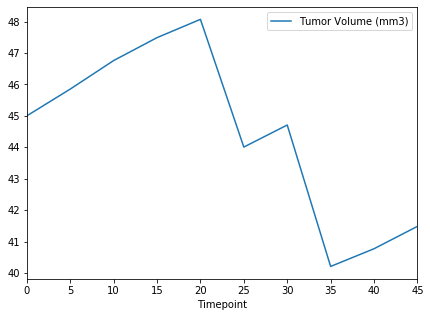

In [10]:
# Generate a line plot of time point versus tumor volume 
# for a single mouse treated with Capomulin
capomulin     = df[df["Drug Regimen"] == "Capomulin"]
capomulin_mid = capomulin.set_index("Mouse ID")
capomulin_mid

onemouse = capomulin_mid.loc[["l509"]]
mplot    = onemouse.plot(kind = 'line', x = 'Timepoint', y ='Tumor Volume (mm3)', figsize=(7, 5))

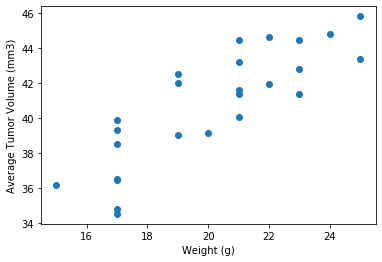

In [11]:
# Generate a scatter plot of mouse weight versus average 
# tumor volume for the Capomulin regimen
capomulin = df[df["Drug Regimen"] == "Capomulin"]
cm = capomulin.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()

plt.scatter(cm['Weight (g)'], cm['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume  is  0.84 


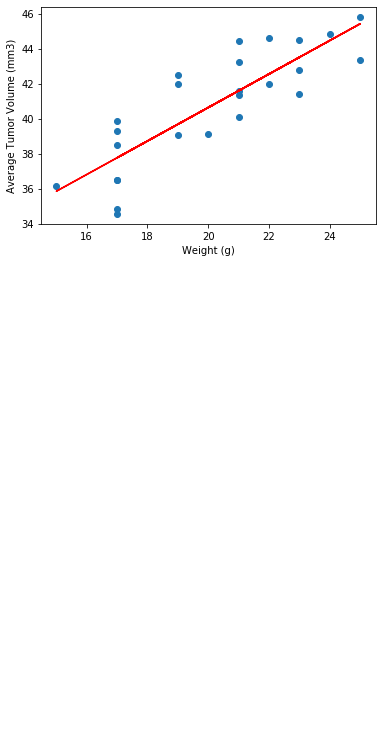

In [12]:
# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn

correlation = st.pearsonr(cm['Weight (g)'], cm['Tumor Volume (mm3)'])

print('The correlation between mouse weight' + 
      '\033[1m and \033[0m' +
      'the average tumor volume ' +
      '\033[1m is \033[0m' + 
       f'\033[36m {correlation[0]:2.2f} \033[0m')

x_values = cm['Weight (g)']
y_values = cm['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#y=a + bx
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Get regression values
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
# line_eq

# regress_values = intercept + (slope * x_values)